# CA1 - Scatterplot to analyse correlation relationship betwwen resale price and floor area, remaining years using HDB dataset (2017 - 2024)

In [1]:
# import the necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # Format the y-axis to display normal values


In [2]:
# 1. Analysing correlation between floor area and resale price

In [3]:
# load csv file and create dataset

filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('floor_area_sqm', 'i8'), ('resale_price', 'i8')], 
                     delimiter=',',
                     usecols=(6, 10),
                     missing_values=['na', '-', 'NA'], filling_values=0)

print(data[:10])
print(data.dtype)
print(data.shape)

[(44, 232000) (67, 250000) (67, 262000) (68, 265000) (67, 265000)
 (68, 275000) (68, 280000) (67, 285000) (68, 285000) (67, 285000)]
[('floor_area_sqm', '<i8'), ('resale_price', '<i8')]
(181874,)


In [4]:
# Printout useful information about the datset 
print("*** Useful summary of dataset - Resale flat prices based on registration date from Jan-2017 onwards ***")
print()
print(f"There are {len(data)} rows and {len(data[0])} columns in this dataset")
print()

print("[The names of the columns are:]")
for col in data.dtype.names:
    print(f"- {col} <class '{data[col].dtype}'> isnumeric: {np.issubdtype(data[col].dtype, np.number)}")
print()

print("[The unique values in each column are:]") 
for col in data.dtype.names:
    unique_values = np.unique(data[col])
    print(f"{len(unique_values)} unique values in {col} column")

*** Useful summary of dataset - Resale flat prices based on registration date from Jan-2017 onwards ***

There are 181874 rows and 2 columns in this dataset

[The names of the columns are:]
- floor_area_sqm <class 'int64'> isnumeric: True
- resale_price <class 'int64'> isnumeric: True

[The unique values in each column are:]
168 unique values in floor_area_sqm column
3850 unique values in resale_price column


In [5]:
# filter out rows where ‘floor_area_sqm’ and ‘resale_price’ are either zero or missing

valid_rows = (~np.isnan(data['floor_area_sqm'])) & (data['floor_area_sqm'] > 0) & (~np.isnan(data['resale_price'])) & (data['resale_price'] > 0)

floor_area_sqm = data[valid_rows]['floor_area_sqm']
resale_price = data[valid_rows]['resale_price']

print(floor_area_sqm[:10])
print(resale_price[:10])
print()
print(floor_area_sqm.dtype)
print(resale_price.dtype)
print()
print(floor_area_sqm.shape)
print(resale_price.shape)

[44 67 67 68 67 68 68 67 68 67]
[232000 250000 262000 265000 265000 275000 280000 285000 285000 285000]

int64
int64

(181728,)
(181728,)


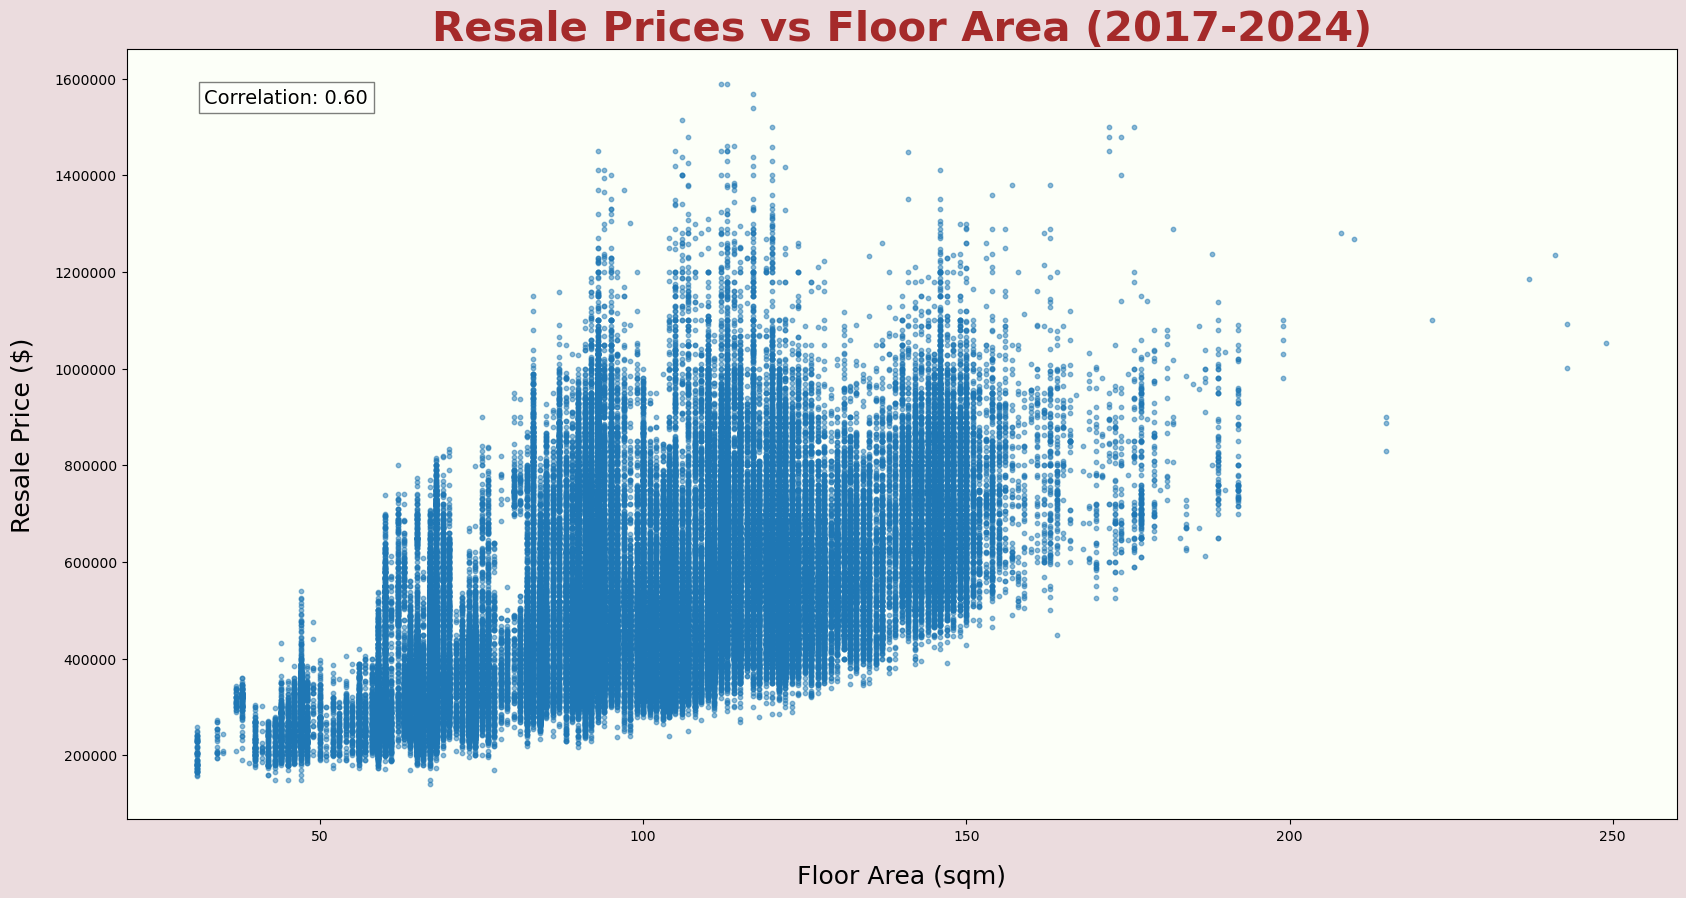

In [6]:
# create scatterplot
fig, ax = plt.subplots(figsize=(20, 10))

# Set background color for the axes and figure of the chart
ax.set_facecolor('#FCFFF8') 
fig.patch.set_facecolor('#ebdcde')

# Format y-axis to display normal values
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

ax.scatter(floor_area_sqm, resale_price, alpha=0.5, s=10)
ax.set_title("Resale Prices vs Floor Area (2017-2024)", fontsize=30, fontweight='bold', color='brown')
ax.set_xlabel("Floor Area (sqm)", fontsize=18, labelpad=15)
ax.set_ylabel("Resale Price ($)", fontsize=18, labelpad=15)

# calculate and add correlation coefficient to chart
correlation_matrix = np.corrcoef(floor_area_sqm, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

plt.text(0.05, 0.95, f"Correlation: {correlation_coefficient:.2f}", 
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.5))

# Save scatterplot to png file
plt.savefig('Scatterplot - Resale Price vs Floor Area.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# 2. Analysing correlation between remaining lease and resale price

In [7]:
filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('remaining_lease', 'U50'), ('resale_price', 'i8')], 
                     delimiter=',',
                     usecols=(9, 10),
                     missing_values=['na', '-', 'NA'], filling_values=0)

print(data[:10])
print(data.dtype)
print(data.shape)

[('61 years 04 months', 232000) ('60 years 07 months', 250000)
 ('62 years 05 months', 262000) ('62 years 01 month', 265000)
 ('62 years 05 months', 265000) ('63 years', 275000)
 ('61 years 06 months', 280000) ('58 years 04 months', 285000)
 ('61 years 06 months', 285000) ('61 years 04 months', 285000)]
[('remaining_lease', '<U50'), ('resale_price', '<i8')]
(181874,)


In [8]:
# manipulate column remaining_lease from text to numeric year only
years_only = np.array([int(lease.split()[0]) for lease in data['remaining_lease']])

print(years_only[:10])
print()
print(years_only.dtype)
print()
print(years_only.shape)

[61 60 62 62 62 63 61 58 61 61]

int32

(181874,)


In [9]:
# filter out rows where ‘years_only’ and ‘resale_price’ are either zero or missing

valid_rows = (~np.isnan(years_only)) & (years_only > 0) & (~np.isnan(data['resale_price'])) & (data['resale_price'] > 0)

remaining_lease = years_only[valid_rows]
resale_price = data[valid_rows]['resale_price']

print(remaining_lease[:10])
print(resale_price[:10])
print()
print(remaining_lease.dtype)
print(resale_price.dtype)
print()
print(remaining_lease.shape)
print(resale_price.shape)

[61 60 62 62 62 63 61 58 61 61]
[232000 250000 262000 265000 265000 275000 280000 285000 285000 285000]

int32
int64

(181829,)
(181829,)


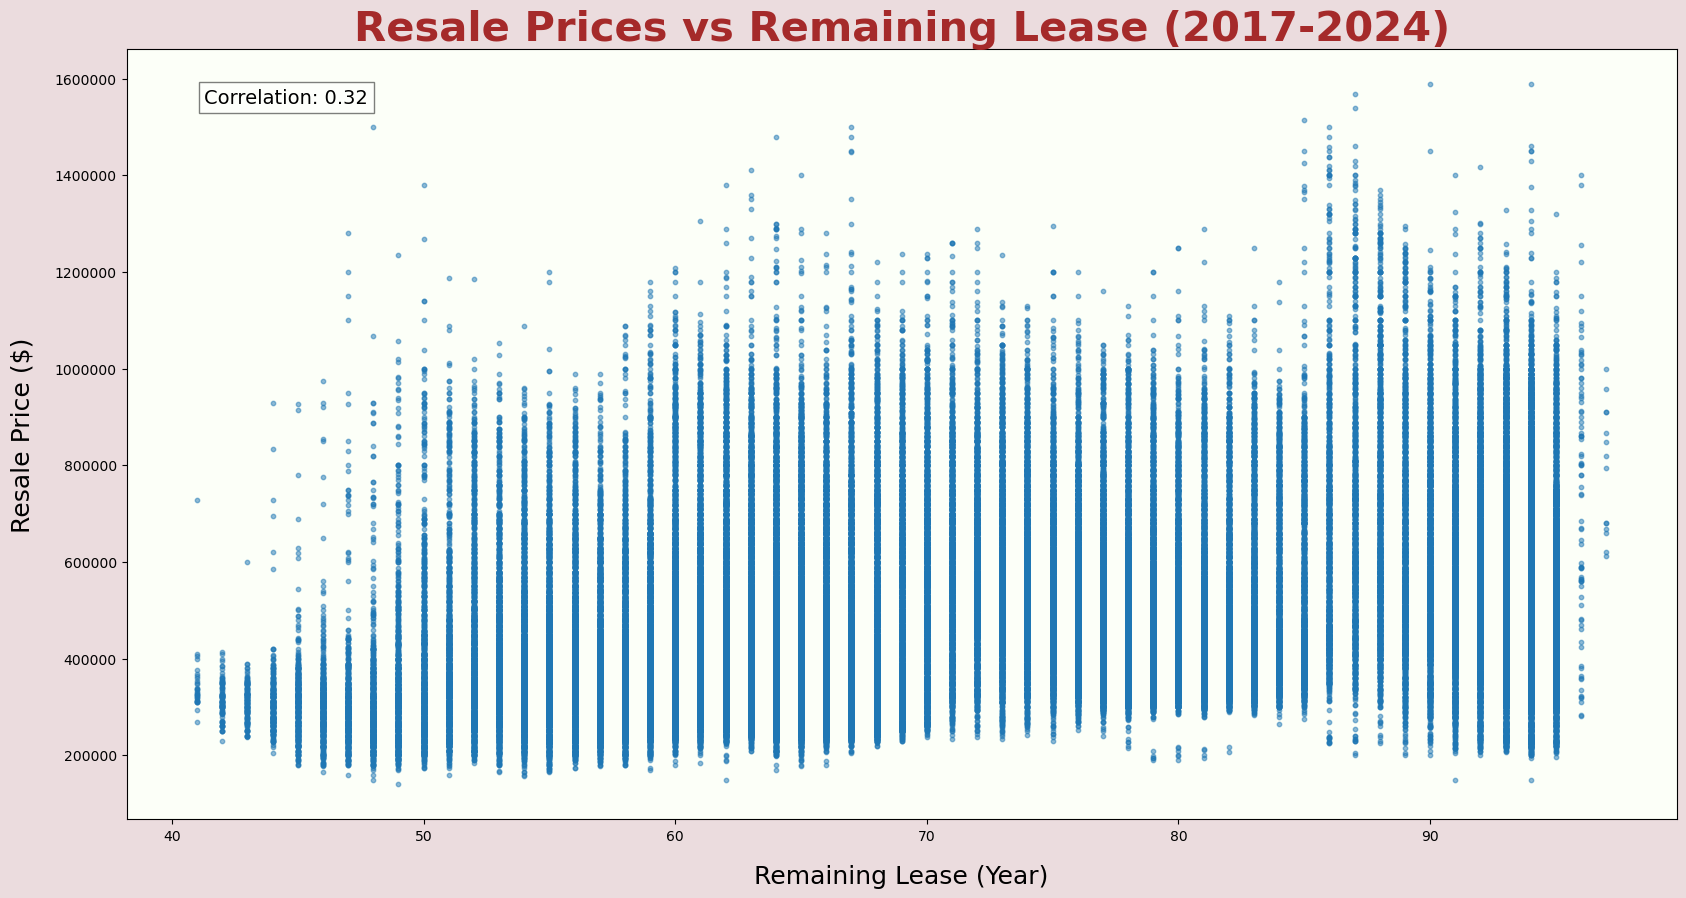

In [10]:
# create scatterplot
fig, ax = plt.subplots(figsize=(20, 10))

# Set background color for the axes and figure of the chart
ax.set_facecolor('#FCFFF8') 
fig.patch.set_facecolor('#ebdcde')

# Format y-axis to display normal values
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

ax.scatter(remaining_lease, resale_price, alpha=0.5, s=10)
ax.set_title("Resale Prices vs Remaining Lease (2017-2024)", fontsize=30, fontweight='bold', color='brown')
ax.set_xlabel("Remaining Lease (Year)", fontsize=18, labelpad=15)
ax.set_ylabel("Resale Price ($)", fontsize=18, labelpad=15)

# calculate and add correlation coefficient to chart
correlation_matrix = np.corrcoef(remaining_lease, resale_price)
correlation_coefficient = correlation_matrix[0, 1] # The off-diagonal elements give the correlation coefficient.

plt.text(0.05, 0.95, f"Correlation: {correlation_coefficient:.2f}", 
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.5))

# Save scatterplot to png file
plt.savefig('Scatterplot - Resale Price vs Remaining Lease.png', dpi=300, bbox_inches='tight')

plt.show()